# **Predictive Analytics: Diabetes Prediction**

Nama: Agistia Ronna Aniqa

Cohort ID: MC299D5X1601

Judul Proyek: Prediksi Risiko Diabetes Menggunakan Machine Learning

# **1. Import Library**

Mengimpor library-library yang dibutuhkan untuk mempersiapkan data, membangun model machine learning, dan mengevaluasi performanya.

In [1]:
import numpy as np  # operasi aljabar linear dan manipulasi data numerik
import matplotlib.pyplot as plt  # membuat visualisasi data (grafik, plot)
import pandas as pd  # manipulasi dan analisis data berbentuk tabel (dataframe)
import seaborn as sns  # visualisasi data yang lebih informatif dan estetis

from sklearn.preprocessing import OneHotEncoder, StandardScaler  # encoding fitur kategori dan standarisasi fitur numerik
from sklearn.model_selection import train_test_split  # membagi dataset menjadi data latih (train) dan data uji (test)
from sklearn.ensemble import RandomForestClassifier  # algoritma Random Forest untuk klasifikasi
from xgboost import XGBClassifier  # algoritma XGBoost untuk klasifikasi
from lightgbm import LGBMClassifier  # algoritma LightGBM untuk klasifikasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # evaluasi performa model

# **2. Data Loading**

Memuat dataset dari direktori atau path yang telah ditentukan.

In [2]:
# Menentukan file ID dari Google Drive
file_id = "1PoXTqeDPrkfJjLW4l98PsYCU3p4ObEtb"

# Membuat URL unduhan langsung
url = f"https://drive.google.com/uc?id={file_id}"

# Membaca dataset dari Google Drive ke dalam dataframe
df = pd.read_csv(url)

Menampilkan beberapa baris pertama dari dataset untuk melihat sampel data dan memahami struktur serta isinya.

In [3]:
# menampilkan 5 baris pertama dari dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **3. Exploratory Data Analysis (EDA)**

## **3.1. Deskripsi Variabel**

Melihat struktur dataset untuk memahami tipe data setiap variabel. Dari hasilnya, terlihat bahwa tidak ada missing value.

In [4]:
# menampilkan informasi ringkas tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Melakukan analisis statistik deskriptif pada variabel numerik. Dari hasilnya, terdapat indikasi adanya outlier pada fitur **blood_glucose_level**, **HbA1c_level**, dan **bmi**.

In [5]:
# menghasilkan statistik deskriptif dari variabel numerik dalam dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## **3.2. Menangani Missing Value dan Outlier**

Mengecek keberadaan missing value dalam dataset sebelum melakukan penanganan data.

In [6]:
# menghitung jumlah missing value (nilai kosong) pada setiap kolom dalam dataset
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Mengecek jumlah total kategori pada fitur **gender**. Diketahui terdapat kategori yang hanya muncul sebanyak 18 data dari keseluruhan dataset, sehingga distribusinya sangat timpang.

In [7]:
# menampilkan jumlah masing-masing kategori unik pada fitur 'gender' dalam dataset
print(df['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


Mengganti kategori dengan jumlah sangat kecil (sekitar 0,001%) menggunakan nilai modus dari kategori lain yang lebih dominan.

In [8]:
# mencari nilai modus (kategori yang paling sering muncul) pada kolom 'gender'
gender_mode = df['gender'].mode()[0]

# mengganti kategori 'Other' pada kolom 'gender' dengan nilai modus tersebut
df['gender'] = df['gender'].replace('Other', gender_mode)

Melakukan pemeriksaan dan penanganan nilai outlier dalam dataset.

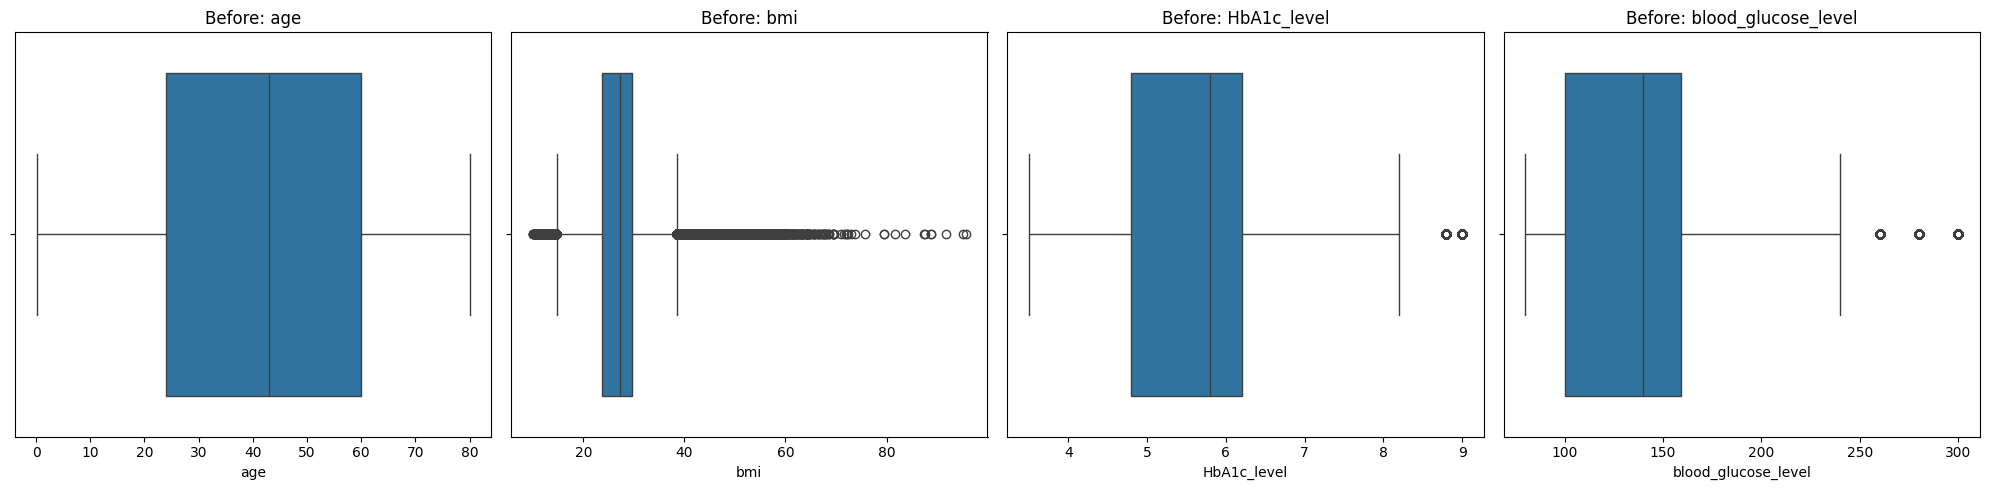


Jumlah Outlier per Kolom (Sebelum Clipping):
age: 0 outlier
bmi: 7086 outlier
HbA1c_level: 1315 outlier
blood_glucose_level: 2038 outlier


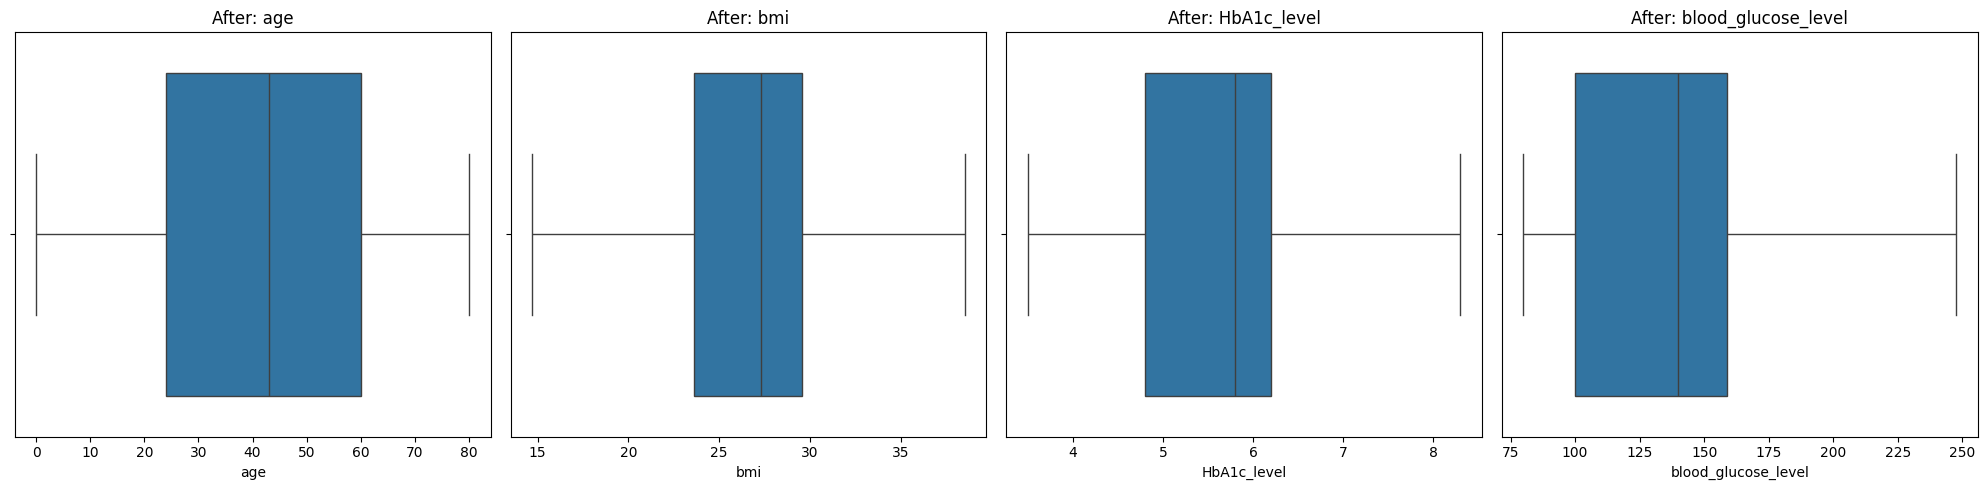

In [9]:
# daftar fitur yang akan dicek dan ditangani outliernya
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# dictionary untuk menyimpan nilai-nilai outlier setiap fitur
outlierValues = {}

# Visualisasi boxplot sebelum penanganan outlier
fig, axes = plt.subplots(1, len(numerical_features), figsize=(5 * len(numerical_features), 5))
if len(numerical_features) == 1:
    axes = [axes]

for ax, col in zip(axes, numerical_features):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Before: {col}")

plt.tight_layout()
plt.show()

# Deteksi dan penanganan outlier menggunakan metode IQR (Interquartile Range)
for col in numerical_features:
    q25 = np.percentile(df[col].dropna(), 25)  # kuartil ke-25 (Q1)
    q75 = np.percentile(df[col].dropna(), 75)  # kuartil ke-75 (Q3)
    iqr = q75 - q25  # rentang interkuartil

    lowerBound = q25 - 1.5 * iqr  # batas bawah untuk outlier
    upperBound = q75 + 1.5 * iqr  # batas atas untuk outlier

    # mencari nilai outlier yang berada di luar batas bawah atau atas
    outliers = df[col][(df[col] < lowerBound) | (df[col] > upperBound)]
    outlierValues[col] = outliers

    # clipping nilai fitur agar berada di dalam batas bawah dan atas (mengatasi outlier)
    df[col] = np.clip(df[col], lowerBound, upperBound)

# Menampilkan jumlah outlier pada setiap fitur sebelum dilakukan clipping
print("\nJumlah Outlier per Kolom (Sebelum Clipping):")
for col, outliers in outlierValues.items():
    print(f"{col}: {len(outliers)} outlier")

# Visualisasi boxplot setelah penanganan outlier
fig, axes = plt.subplots(1, len(numerical_features), figsize=(5 * len(numerical_features), 5))
if len(numerical_features) == 1:
    axes = [axes]

for ax, col in zip(axes, numerical_features):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"After: {col}")

plt.tight_layout()
plt.show()

## **3.3. Univariate Analysis**

Mengelompokkan kolom-kolom dataset menjadi fitur numerik dan kategorikal.

In [10]:
# daftar fitur numerik yang akan dianalisis
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# daftar fitur kategorikal yang akan dianalisis
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

Memvisualisasikan distribusi nilai dari semua kolom numerik untuk memahami sebaran data.

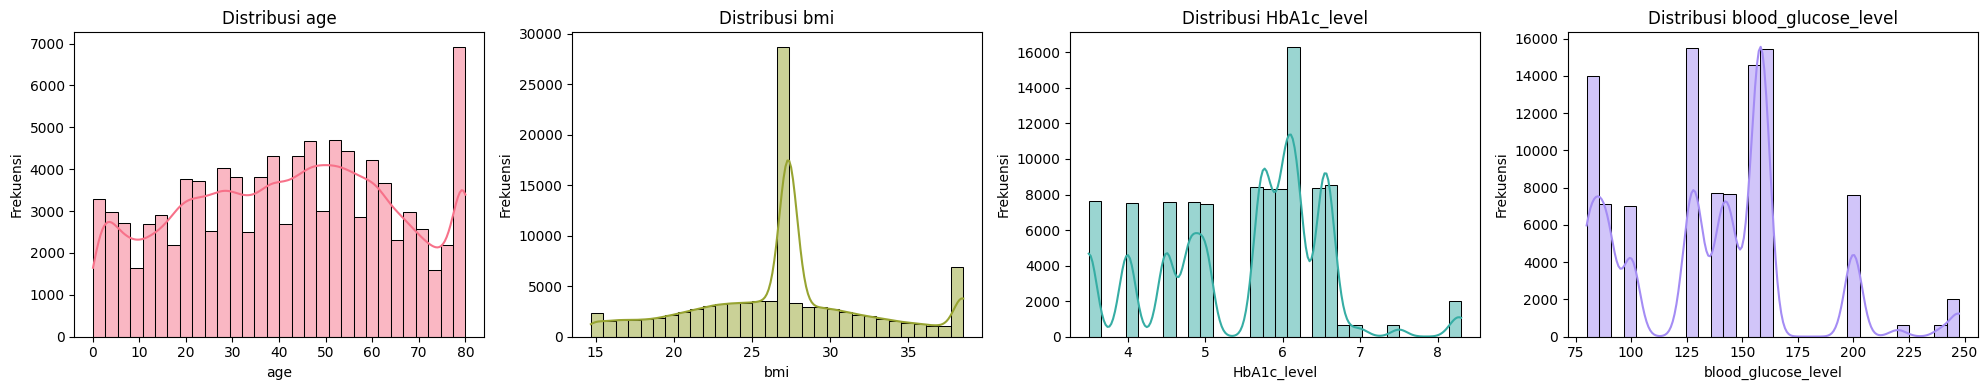

In [11]:
# Membuat figure dengan ukuran lebar disesuaikan dengan jumlah fitur numerik
plt.figure(figsize=(5 * len(numerical_features), 4))

for i, col in enumerate(numerical_features, 1):
    # Membuat subplot secara horizontal untuk setiap fitur numerik
    plt.subplot(1, len(numerical_features), i)

    # Memilih warna berbeda untuk setiap plot dari palet 'husl'
    color = sns.color_palette("husl", len(numerical_features))[i-1]

    # Jika fitur memiliki lebih dari 10 nilai unik, gunakan histogram dengan KDE untuk visualisasi distribusi
    if df[col].nunique() > 10:
        sns.histplot(df[col].dropna(), bins=30, kde=True, color=color)
    # Jika fitur memiliki 10 atau kurang nilai unik, gunakan countplot untuk menghitung frekuensi kategori
    else:
        sns.countplot(x=df[col], palette="husl")

    # Memberi judul dan label sumbu pada plot
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

# Mengatur layout supaya plot tidak tumpang tindih
plt.tight_layout()
# Menampilkan seluruh plot
plt.show()

Memvisualisasikan distribusi frekuensi nilai untuk setiap kategori pada semua kolom kategorikal.


Distribusi Kategori untuk 'gender':
        Jumlah Sampel  Persentase
gender                           
Female          58570        58.6
Male            41430        41.4
--------------------------------------------------

Distribusi Kategori untuk 'hypertension':
              Jumlah Sampel  Persentase
hypertension                           
0                     92515        92.5
1                      7485         7.5
--------------------------------------------------

Distribusi Kategori untuk 'heart_disease':
               Jumlah Sampel  Persentase
heart_disease                           
0                      96058        96.1
1                       3942         3.9
--------------------------------------------------

Distribusi Kategori untuk 'smoking_history':
                 Jumlah Sampel  Persentase
smoking_history                           
No Info                  35816        35.8
never                    35095        35.1
former                    9352         9.4
cu

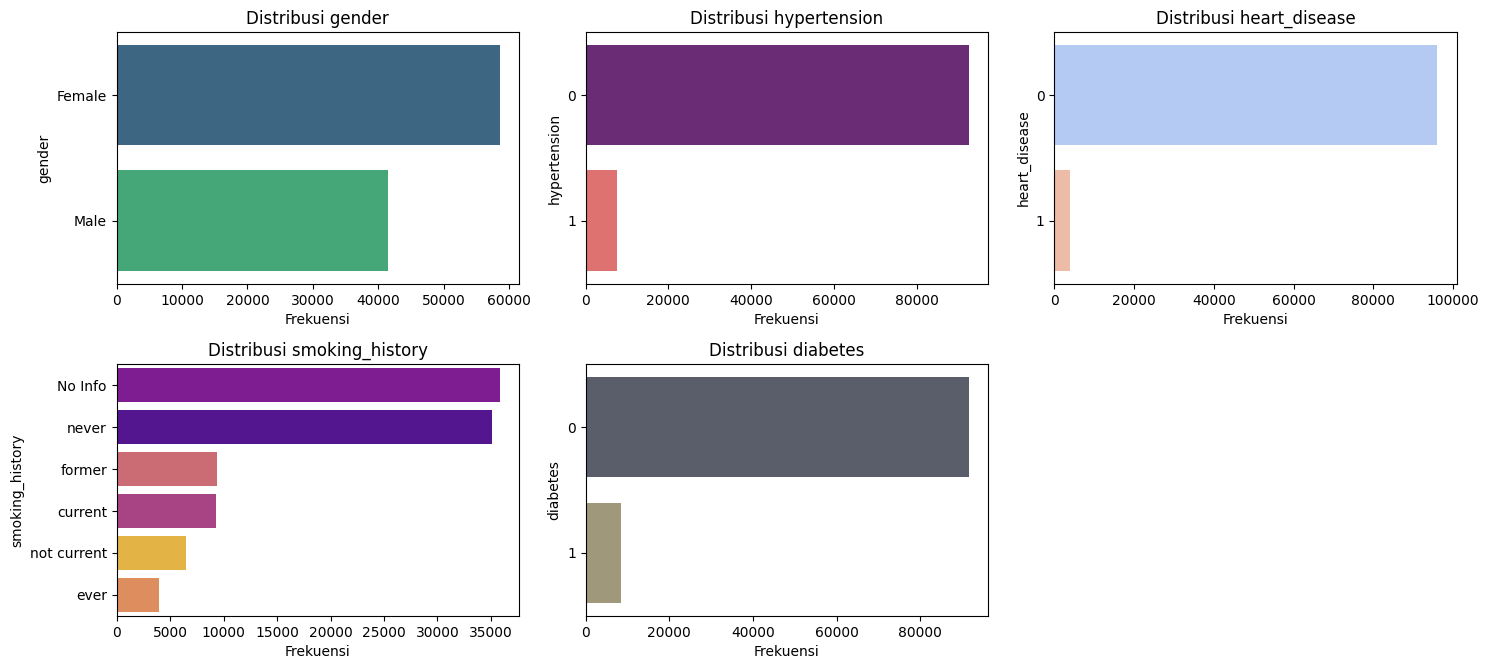

In [12]:
# Membuat figure dengan ukuran besar untuk menampung beberapa subplot distribusi kategori
plt.figure(figsize=(15, 13))

# Daftar palet warna berbeda untuk tiap plot agar visualisasi menarik dan mudah dibedakan
palettes = [
    "viridis", "magma", "coolwarm", "plasma", "cividis", "inferno",
]

# Menampilkan tabel distribusi jumlah dan persentase sampel untuk setiap kategori dalam tiap fitur kategorikal
for col in categorical_features:
    count = df[col].value_counts()
    percent = 100 * df[col].value_counts(normalize=True)

    df_count = pd.DataFrame({'Jumlah Sampel': count, 'Persentase': percent.round(1)})

    print(f"\nDistribusi Kategori untuk '{col}':")
    print(df_count)
    print("-" * 50)

# Membuat subplot untuk masing-masing fitur kategorikal dan memvisualisasikan distribusi frekuensi kategori menggunakan countplot
for i, (col, palette) in enumerate(zip(categorical_features, palettes), 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], palette=palette, legend=False)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Frekuensi")
    plt.ylabel(col)

# Mengatur layout subplot agar tidak tumpang tindih
plt.tight_layout()
# Menampilkan seluruh plot
plt.show()

## **3.4. Multivariate Analysis**

Melakukan analisis hubungan rata-rata status diabetes dengan fitur-fitur lain dalam dataset.

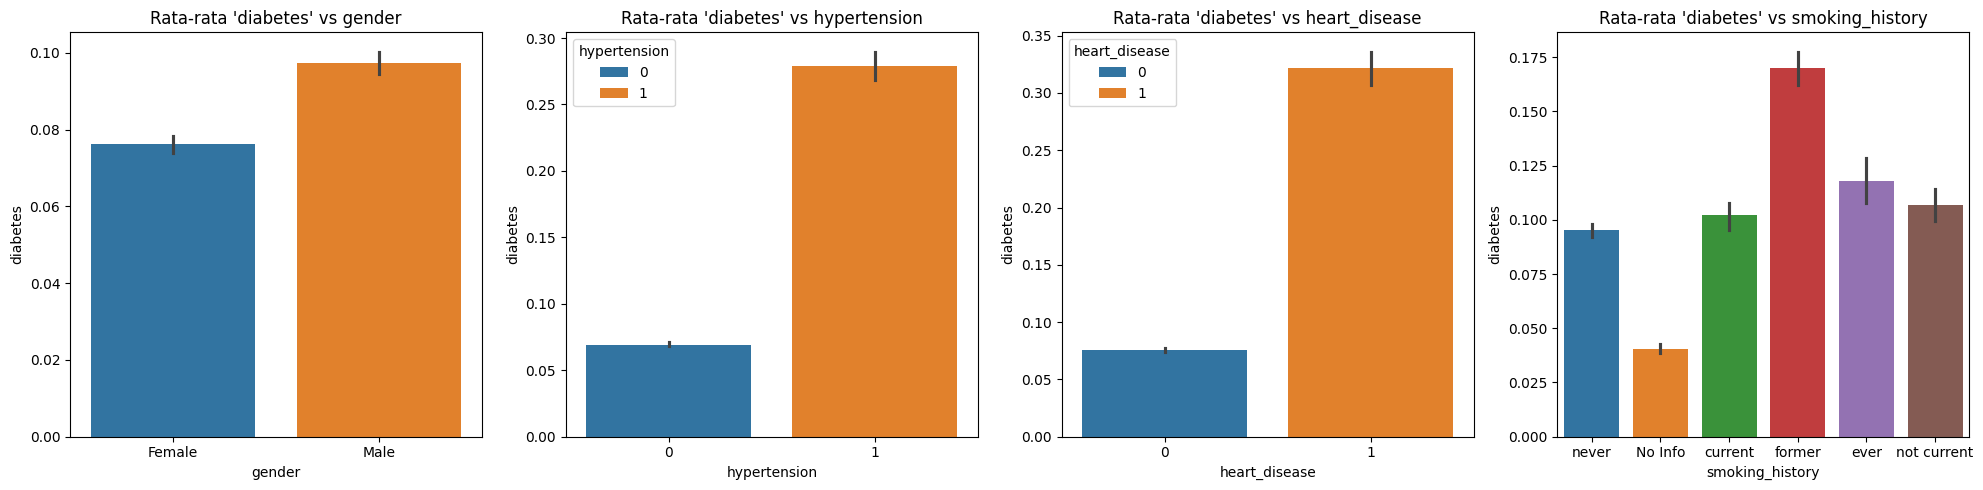

In [13]:
# Mendefinisikan fitur kategorikal yang akan dianalisis hubungannya dengan diabetes
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

# Membuat subplot secara horizontal sesuai jumlah fitur kategorikal yang akan dianalisis
fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))

# Melakukan iterasi untuk tiap fitur kategorikal
for i, col in enumerate(categorical_features):
    # Membuat barplot yang menampilkan rata-rata nilai 'diabetes' untuk setiap kategori pada fitur tersebut
    sns.barplot(x=col, y="diabetes", data=df, ax=axes[i], hue=col, estimator=lambda x: sum(x)/len(x))
    axes[i].set_title(f"Rata-rata 'diabetes' vs {col}")

# Mengatur layout supaya subplot tidak saling tumpang tindih
plt.tight_layout()
# Menampilkan plot
plt.show()

Memvisualisasikan hubungan dan korelasi antar variabel dalam dataset.

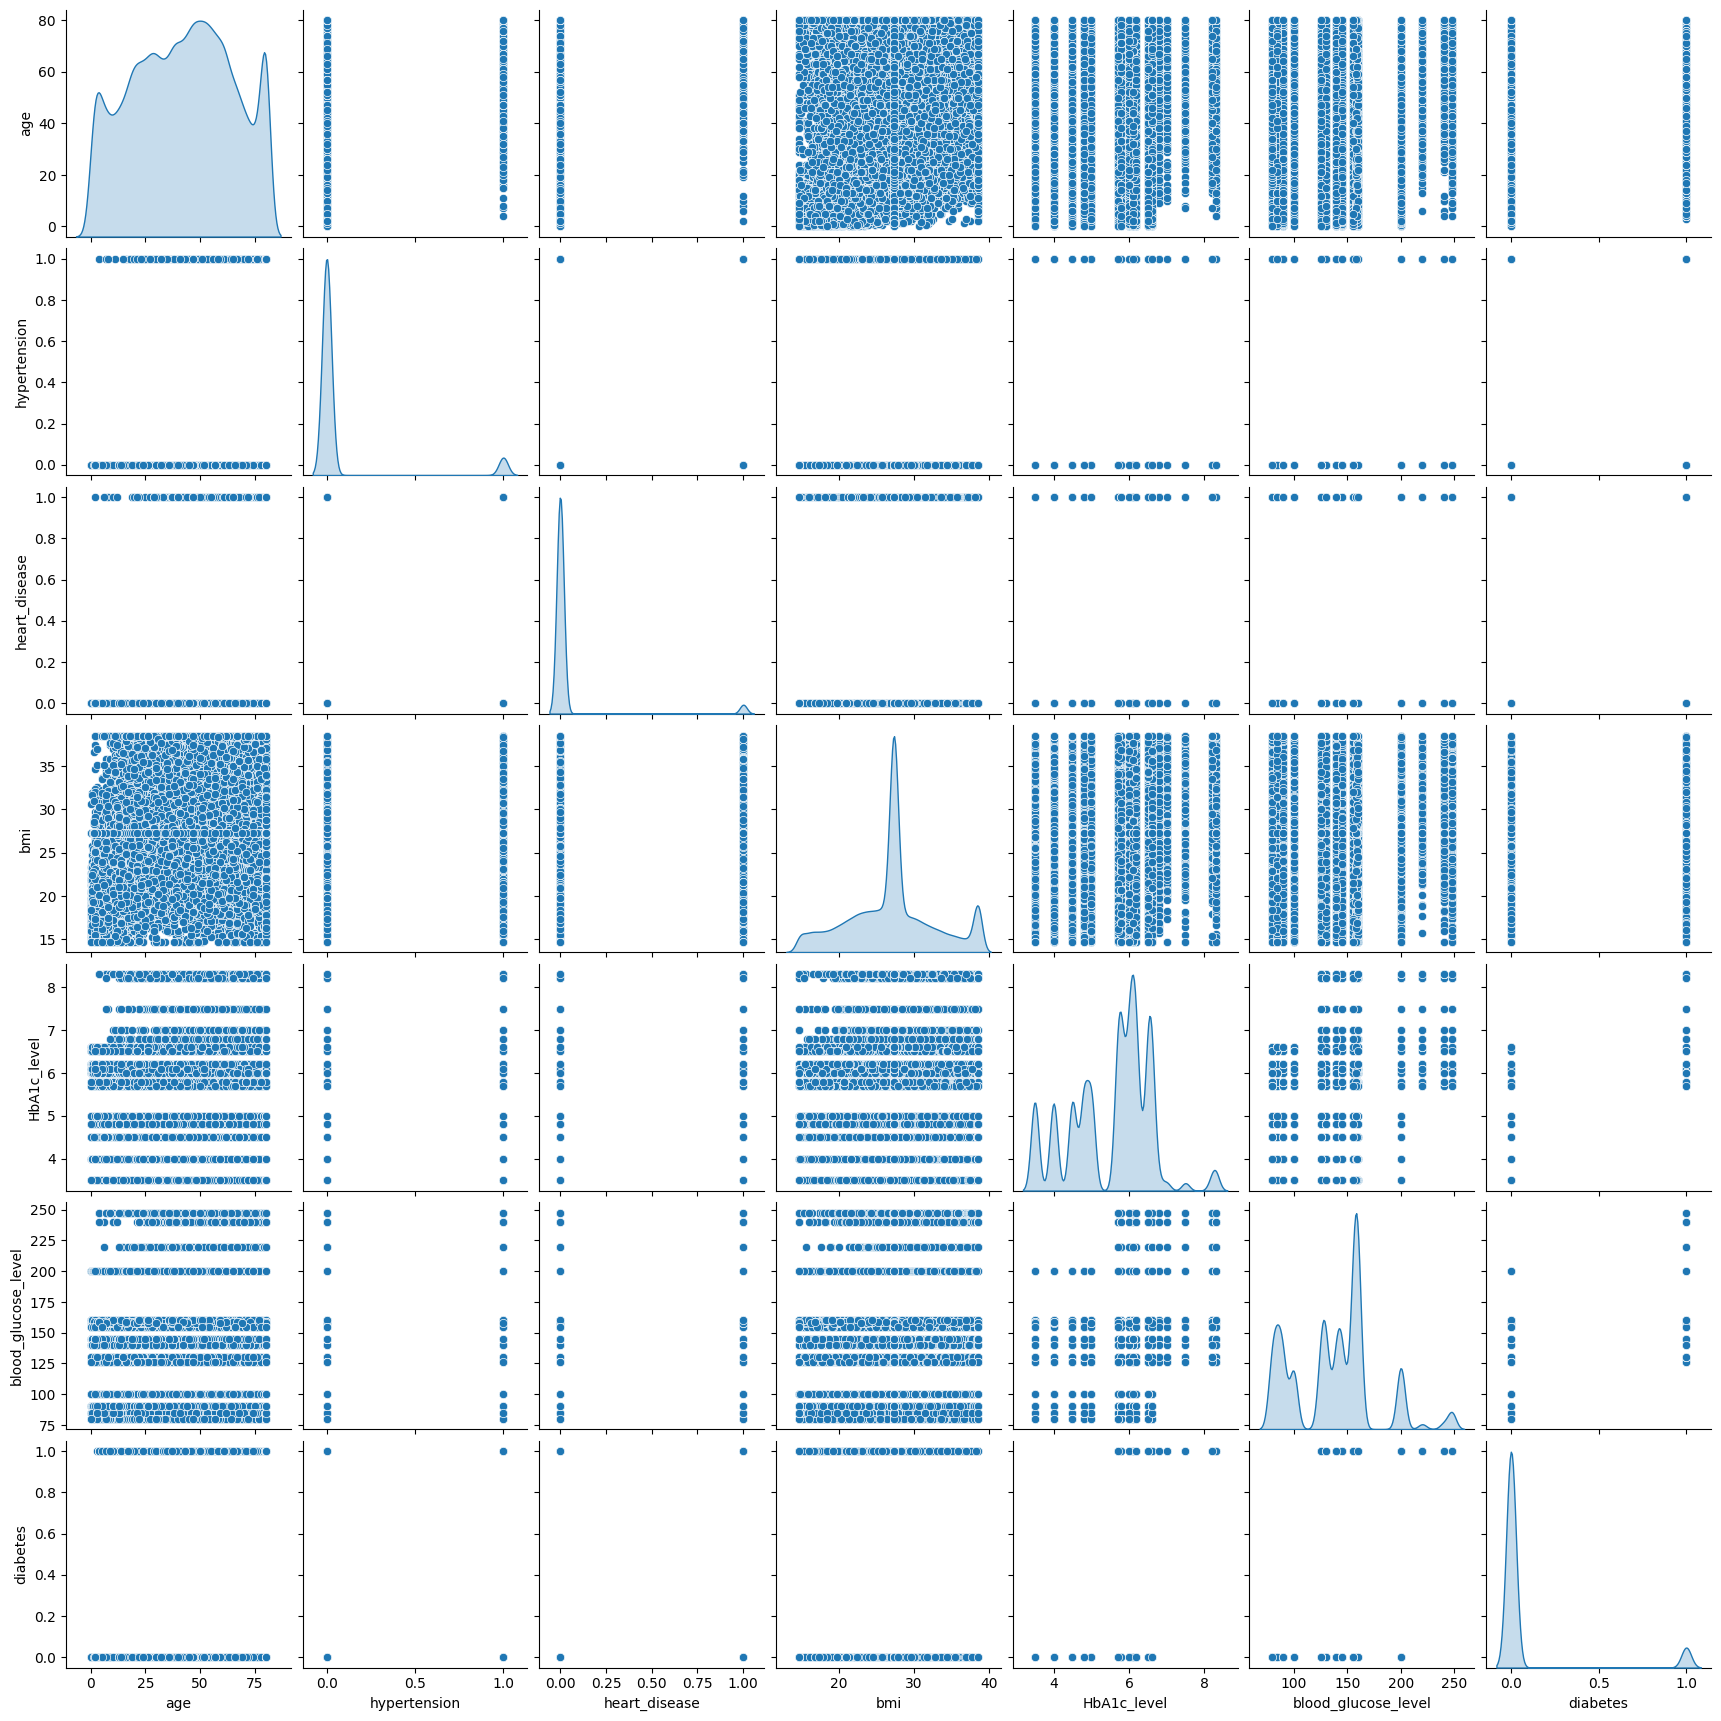

In [14]:
# Membuat pairplot untuk memvisualisasikan hubungan antar variabel numerik dalam dataset
sns.pairplot(df, diag_kind='kde')

Memvisualisasikan matriks korelasi untuk melihat sejauh mana hubungan antar fitur, termasuk korelasi terhadap target/label (diabetes).

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

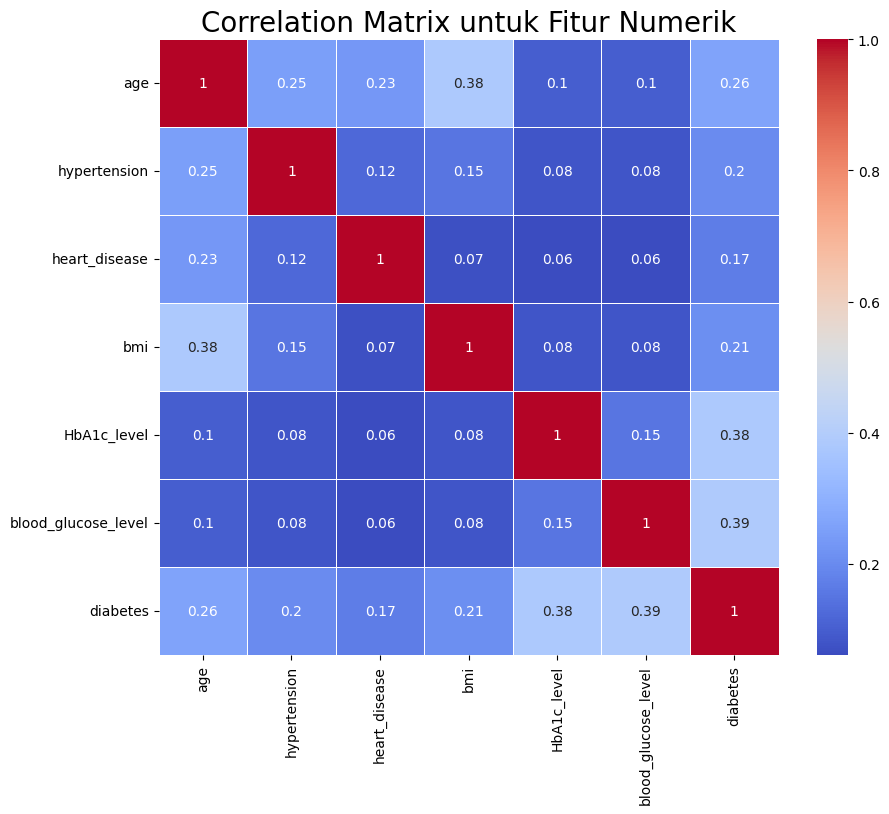

In [15]:
# Memilih semua kolom bertipe numerik dari dataset
numerical_features = df.select_dtypes(include=['number']).columns

# Membuat figure dengan ukuran 10x8 untuk heatmap korelasi
plt.figure(figsize=(10, 8))

# Menghitung matriks korelasi antar fitur numerik dan membulatkan hasilnya hingga 2 desimal
correlation_matrix = df[numerical_features].corr().round(2)

# Membuat heatmap untuk menampilkan nilai korelasi antar fitur numerik
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Memberikan judul pada heatmap
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

# **4. Data Preparation**

## **4.1. Encoding Fitur Kategorikal**

Melakukan encoding pada fitur kategorikal (`gender` dan `smoking_history`) menjadi fitur numerik menggunakan OneHotEncoder.

In [16]:
# Mendefinisikan fitur kategorikal yang akan di-encode
categorical_features = ['gender', 'smoking_history']

# Membuat objek OneHotEncoder dengan opsi 'handle_unknown="ignore"' untuk mengabaikan kategori tak dikenal
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Melakukan fitting dan transformasi fitur kategorikal menjadi array numerik
encoded_array = encoder.fit_transform(df[categorical_features])

# Mengubah hasil encoded array menjadi DataFrame baru dengan nama kolom yang sesuai
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features), index=df.index)

# Menghapus kolom kategorikal asli dari dataset
df = df.drop(columns=categorical_features)

# Menggabungkan DataFrame hasil encoding ke DataFrame utama
df = pd.concat([df, encoded_df], axis=1)

Mengecek hasil dari OneHotEncoder yang menghasilkan fitur-fitur baru dari proses encoding.

In [17]:
# Menampilkan lima baris pertama dari DataFrame utama setelah proses OneHotEncoder
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## **4.2. Standarisasi Fitur**

Melakukan standarisasi (penyamaan skala) pada fitur numerik yang memiliki rentang nilai berbeda, seperti `age`, `bmi`, `blood_glucose_level`, dan `HbA1c_level`, menggunakan StandardScaler agar semua fitur berada pada skala yang seragam.

In [18]:
# Mendefinisikan fitur-fitur numerik yang akan distandarisasi
numerical_features = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']

# Membuat objek StandardScaler untuk melakukan standarisasi (mean = 0, std = 1)
scaler = StandardScaler()

# Melakukan fitting dan transformasi pada fitur numerik, lalu menyimpan hasilnya kembali ke DataFrame
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Melihat hasil perubahan nilai pada fitur-fitur numerik setelah dilakukan standarisasi.

In [19]:
# Menampilkan lima baris pertama dari DataFrame untuk melihat hasil akhir setelah proses standarisasi fitur numerik
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.317679,1.031178,0.067835,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.538006,0,0,0.057889,1.031178,-1.490353,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.616691,0,0,0.057889,0.172162,0.535292,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.261399,0,0,-0.624482,-0.495962,0.457382,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.515058,1,1,-1.208112,-0.686854,0.457382,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## **4.3. Train-Test Split**

Membagi dataset menjadi data latih (train) dan data uji (test), dengan proporsi 70% untuk train (~70.000 sampel) dan 30% untuk test (~30.000 sampel).

In [20]:
# Memisahkan fitur (X) dan target/label (y)
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# Membagi data menjadi data train dan test dengan test_size 30%, dan random_state untuk memastikan hasil reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Menampilkan dimensi (shape) dari data train dan test untuk memastikan pembagian berhasil
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (70000, 14)
y_train shape: (70000,)
X_test shape: (30000, 14)
y_test shape: (30000,)


# **5. Model Development**

## **5.1. Random Forest**

Memuat model Random Forest dan melatihnya menggunakan data latih (train).

In [21]:
# Membuat objek RandomForestClassifier dengan 100 pohon (n_estimators) dan random_state agar hasil reproducible
model_randomforest = RandomForestClassifier(n_estimators=100, random_state=123)

# Melatih model Random Forest dengan data train
model_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

## **5.2. XGBoost**

Memuat model XGBoost dan melatihnya menggunakan data latih (train).

In [22]:
# Membuat objek XGBClassifier dengan pengaturan untuk menonaktifkan use_label_encoder (agar kompatibel)
model_xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)

# Melatih model XGBoost dengan data train
model_xgboost.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=123, ...)

## **5.3. LightGBM**

Memuat model LightGBM dan melatihnya menggunakan data latih (train).

In [23]:
# Membuat objek LGBMClassifier dengan random_state untuk memastikan hasil reproducible
model_lightgbm = LGBMClassifier(random_state=123)

# Melatih model LightGBM dengan data train
model_lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5938, number of negative: 64062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084829 -> initscore=-2.378479
[LightGBM] [Info] Start training from score -2.378479


LGBMClassifier(random_state=123)

# **6. Evaluasi Model**

## **6.1. Random Forest**

Melakukan evaluasi model Random Forest menggunakan metrik `accuracy_score` dan `classification_report` yang mencakup precision, recall, dan f1-score. Juga ditampilkan confusion matrix dalam bentuk angka dan visualisasi heatmap.


Model: Random Forest
Test Accuracy: 0.9683

--- Classification Report Random Forest ---
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27438
           1       0.93      0.68      0.79      2562

    accuracy                           0.97     30000
   macro avg       0.95      0.84      0.88     30000
weighted avg       0.97      0.97      0.97     30000

Confusion Matrix Random Forest
[[27310   128]
 [  822  1740]]


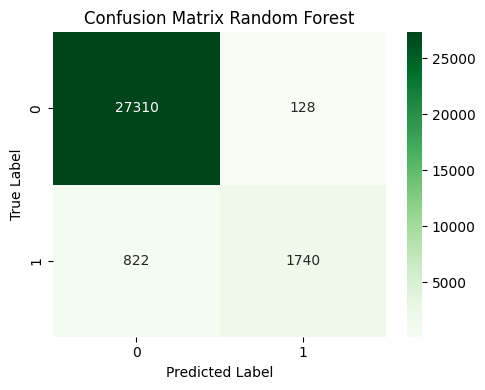

In [24]:
# Melakukan prediksi pada data test menggunakan model Random Forest
y_test_pred = model_randomforest.predict(X_test)

# Menghitung akurasi pada data test
test_acc = accuracy_score(y_test, y_test_pred)

# Menampilkan hasil akurasi
print(f"\nModel: Random Forest")
print(f"Test Accuracy: {test_acc:.4f}")

# Menampilkan classification report (precision, recall, f1-score, support)
print("\n--- Classification Report Random Forest ---\n", classification_report(y_test, y_test_pred))

# Menghitung confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix dalam bentuk angka
print('Confusion Matrix Random Forest')
print(test_cm)

# Visualisasi confusion matrix dalam bentuk heatmap
fig, axes = plt.subplots(1, figsize=(5, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', ax=axes)
axes.set_title("Confusion Matrix Random Forest")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")

plt.tight_layout()
plt.show()

## **6.2. XGBoost**

Melakukan evaluasi model XGBoost menggunakan metrik `accuracy_score` dan `classification_report` yang mencakup precision, recall, dan f1-score. Juga ditampilkan confusion matrix dalam bentuk angka dan visualisasi heatmap.



Model: XGBoost
Test Accuracy: 0.9698

--- Classification Report XGBoost ---
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27438
           1       0.95      0.68      0.79      2562

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

Confusion Matrix XGBoost
[[27344    94]
 [  813  1749]]


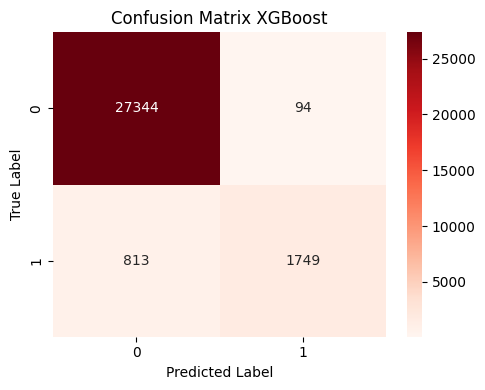

In [25]:
# Melakukan prediksi pada data test menggunakan model XGBoost
y_test_pred = model_xgboost.predict(X_test)

# Menghitung akurasi pada data test
test_acc = accuracy_score(y_test, y_test_pred)

# Menampilkan hasil akurasi
print(f"\nModel: XGBoost")
print(f"Test Accuracy: {test_acc:.4f}")

# Menampilkan classification report (precision, recall, f1-score, support)
print("\n--- Classification Report XGBoost ---\n", classification_report(y_test, y_test_pred))

# Menghitung confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix dalam bentuk angka
print('Confusion Matrix XGBoost')
print(test_cm)

# Visualisasi confusion matrix dalam bentuk heatmap
fig, axes = plt.subplots(1, figsize=(5, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', ax=axes)
axes.set_title("Confusion Matrix XGBoost")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")

plt.tight_layout()
plt.show()

### **6.3. LightGBM**

Melakukan evaluasi model LightGBM menggunakan metrik `accuracy_score` dan `classification_report` yang mencakup precision, recall, dan f1-score. Juga ditampilkan confusion matrix dalam bentuk angka dan visualisasi heatmap.



Model: LightGBM
Test Accuracy: 0.9705

--- Classification Report LightGBM ---
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27438
           1       0.97      0.67      0.80      2562

    accuracy                           0.97     30000
   macro avg       0.97      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

Confusion Matrix LightGBM
[[27389    49]
 [  835  1727]]


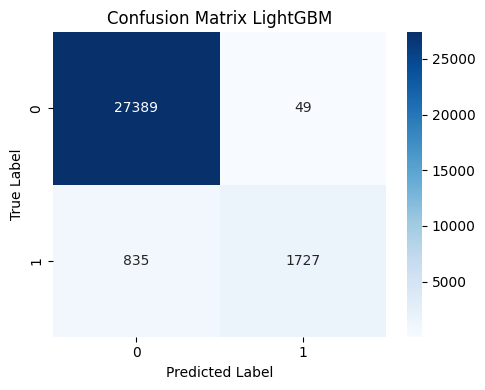

In [26]:
# Melakukan prediksi pada data test menggunakan model LightGBM
y_test_pred = model_lightgbm.predict(X_test)

# Menghitung akurasi model pada data test
test_acc = accuracy_score(y_test, y_test_pred)

# Menampilkan akurasi hasil prediksi
print(f"\nModel: LightGBM")
print(f"Test Accuracy: {test_acc:.4f}")

# Menampilkan classification report: precision, recall, f1-score, support
print("\n--- Classification Report LightGBM ---\n", classification_report(y_test, y_test_pred))

# Menghitung confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix dalam bentuk angka
print('Confusion Matrix LightGBM')
print(test_cm)

# Visualisasi confusion matrix dalam bentuk heatmap
fig, axes = plt.subplots(1, figsize=(5, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title("Confusion Matrix LightGBM")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")

plt.tight_layout()
plt.show()